# Импорт библиотек

In [1]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

# Подготовка данных

In [ ]:
df = pd.read_csv("../data/frames_errors.csv", header=None)
df.columns = [
    "block_id",  # ID блока
    "frame_idx",  # ID фрейма в блоке
    "E_mu_Z",  # Факт: Реальный QBER в Z-базисе
    "E_mu_phys_est",  # Альтернативная оценка QBER, основанная на физических параметрах
    "E_mu_X",  # Факт: Реальный QBER в X-базисе
    "E_nu1_X",  # QBER для decoy-состояния nu1 в X-базисе
    "E_nu2_X",  # QBER для decoy-состояния nu2 в X-базисе
    "E_nu1_Z",  # QBER для decoy-состояния nu1 в Z-базисе
    "E_nu2_Z",  # QBER для decoy-состояния nu2 в Z-базисе
    "N_mu_X",  # Количество отправленных сигнальных состояний в X-базисе
    "M_mu_XX",  # Количество принятых сигнальных состояний (отправлено в X, принято в X)
    "M_mu_XZ",  # Количество принятых сигнальных состояний (отправлено в X, принято в Z)
    "M_mu_X",  # Общее количество принятых сигнальных состояний в X-базисе
    "N_mu_Z",  # Количество отправленных сигнальных состояний в Z-базисе
    "M_mu_ZZ",  # Количество принятых сигнальных состояний (отправлено в Z, принято в Z)
    "M_mu_Z",  # Общее количество принятых сигнальных состояний в Z-базисе
    "N_nu1_X",  # Количество отправленных decoy-состояний nu1 в X-базисе
    "M_nu1_XX",
    "M_nu1_XZ",
    "M_nu1_X",
    "N_nu1_Z",
    "M_nu1_ZZ",
    "M_nu1_Z",
    "N_nu2_X",
    "M_nu2_XX",
    "M_nu2_XZ",
    "M_nu2_X",
    "N_nu2_Z",
    "M_nu2_ZZ",
    "M_nu2_Z",
    "nTot",  # Общее количество отправленных состояний
    "bayesImVoltage",  # Напряжение на модуляторе интенсивности
    "opticalPower",  # Оптическая мощность
    "polarizerVoltages[0]",  # Напряжение на контроллере поляризации 0
    "polarizerVoltages[1]",  # Напряжение на контроллере поляризации 1
    "polarizerVoltages[2]",  # Напряжение на контроллере поляризации 2
    "polarizerVoltages[3]",  # Напряжение на контроллере поляризации 3
    "temp_1",  # Температура детектора 1
    "biasVoltage_1",  # Напряжение смещения детектора 1
    "temp_2",  # Температура детектора 2
    "biasVoltage_2",  # Напряжение смещения детектора 2
    "synErr",  # Кол-во ошибок в битах
    "N_EC_rounds",  # Результат: Количество доп. раундов коррекции (индикатор сложности)
    "maintenance_flag",  # Флаг технического обслуживания
    "estimator_name",  # Название алгоритма, который выбрал параметры в реальности
    "f_EC",  # Эффективность коррекции ошибок
    "E_mu_Z_est",  # Предсказание: Оценка QBER, на основе которой были выбраны R, s, p
    "R",  # Параметр: Скорость кода
    "s",  # Параметр: Количество укороченных узлов
    "p",  # Параметр: Количество проколотых узлов
]

In [12]:
missing_counts = df.isna().sum()
columns_with_missing = missing_counts[missing_counts > 0]

if columns_with_missing.empty:
    print("Пропусков в данных нет.")
else:
    print("Столбцы с пропусками и их количество:")
    print(columns_with_missing)

Столбцы с пропусками и их количество:
E_mu_phys_est    448
f_EC             131
dtype: int64


In [14]:
timestamp_counts = df.groupby("id")["date"].nunique()
print("Количество фреймов / Количество рядов")
print(timestamp_counts.value_counts())

KeyError: 'id'

In [ ]:
# Создаем два под-датафрейма: для оптимистичных и пессимистичных прогнозов
df_optimistic = df[df["E_mu_Z_est"] < df["E_mu_Z"]]
df_pessimistic = df[df["E_mu_Z_est"] > df["E_mu_Z"]]

# Считаем среднее для каждой группы
avg_rounds_optimistic = df_optimistic["N_EC_rounds"].mean()
avg_rounds_pessimistic = df_pessimistic["N_EC_rounds"].mean()

print(f"Количество оптимистичных прогнозов (E_mu_Z_est < E_mu_Z): {len(df_optimistic)}")
print(f"Средний N_EC_rounds для них: {avg_rounds_optimistic:.4f}\n")

print(f"Количество пессимистичных прогнозов (E_mu_Z_est > E_mu_Z): {len(df_pessimistic)}")
print(f"Средний N_EC_rounds для них: {avg_rounds_pessimistic:.4f}")

Количество оптимистичных прогнозов (E_mu_Z_est < E_mu_Z): 152624
Средний N_EC_rounds для них: 9.4753

Количество пессимистичных прогнозов (E_mu_Z_est > E_mu_Z): 175417
Средний N_EC_rounds для них: 2.0533


In [ ]:
pessimistic_diff = df_pessimistic["E_mu_Z_est"] - df_pessimistic["E_mu_Z"]
avg_pessimistic_overestimation = pessimistic_diff.mean()
print(
    f"В среднем, в пессимистичных случаях E_mu_Z_est больше E_mu_Z на: {avg_pessimistic_overestimation:.6f}"
)

В среднем, в пессимистичных случаях E_mu_Z_est больше E_mu_Z на: 0.001945


In [ ]:
avg_pessimistic_ratio = (df_pessimistic["E_mu_Z_est"] / df_pessimistic["E_mu_Z"]).mean()

print(
    f"В среднем, в пессимистичных случаях E_mu_Z_est больше E_mu_Z в: {avg_pessimistic_ratio:.4f} раз"
)

В среднем, в пессимистичных случаях E_mu_Z_est больше E_mu_Z в: 1.1023 раз


(array([1.5144e+05, 6.9400e+03, 4.4850e+03, 3.8720e+03, 4.7640e+03,
        3.0100e+03, 7.6600e+02, 1.2200e+02, 1.6000e+01, 2.0000e+00]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

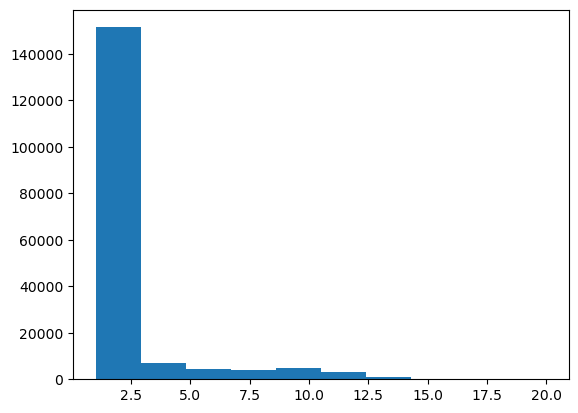

In [ ]:
plt.hist(df_pessimistic["N_EC_rounds"])

In [5]:
original_id_order = pd.unique(df["id"])

# 2. Выполняем заполнение пропусков (это отсортирует df по 'id')
df_for_ts = df.set_index(["id", "date"]).unstack().ffill().stack()

# 3. Восстанавливаем исходный порядок блоков
# Превращаем 'id' в категориальный тип с заданным порядком
df_for_ts = df_for_ts.reindex(original_id_order, level="id").reset_index()


# --- Проверка ---
timestamp_counts = df_for_ts.groupby("id")["date"].nunique()
print("\nПосле заполнения с сохранением порядка:")
print("Количество фреймов / Количество рядов")
print(timestamp_counts.value_counts())


После заполнения с сохранением порядка:
Количество фреймов / Количество рядов
date
400    815
399      8
Name: count, dtype: int64


In [6]:
start_idx = df_for_ts[(df_for_ts["id"] == 1489460492) & (df_for_ts["date"] == 99)].index[0]
end_idx = df_for_ts[(df_for_ts["id"] == 1840064900) & (df_for_ts["date"] == 101)].index[0]

df_for_ts_submit = df_for_ts.loc[start_idx:end_idx].copy()
df_for_ts_submit

,id,date,value,E_mu_phys_est,E_mu_X,E_nu1_X,E_nu2_X,E_nu1_Z,E_nu2_Z,N_mu_X,...,biasVoltage_2,synErr,N_EC_rounds,maintenance_flag,estimator_name,f_EC,E_mu_Z_est,R,s,p
286494,1489460492,99,0.02507,0.03107,0.02330,0.03704,0.50000,0.05506,0.40426,5638959.0,...,63.0,13557.0,22.0,0.0,EMA,1.846163,0.02236,0.8,3232.0,1568.0
286495,1489460492,100,0.02121,0.02357,0.02215,0.00000,0.00000,0.04689,0.35366,5641264.0,...,63.0,13557.0,2.0,0.0,EMA,1.221289,0.02327,0.8,3386.0,1414.0
286496,1489460492,101,0.02029,0.01009,0.01890,0.07143,0.60000,0.03922,0.41758,5637943.0,...,63.0,13557.0,3.0,0.0,EMA,1.266175,0.02258,0.8,3270.0,1530.0
286497,1489460492,102,0.01904,0.01623,0.00931,0.00000,0.00000,0.04377,0.36275,5637882.0,...,63.0,13557.0,2.0,0.0,EMA,1.220793,0.02182,0.8,3140.0,1660.0
286498,1489460492,103,0.02018,0.03445,0.01509,0.10526,0.25000,0.05614,0.35227,5633105.0,...,63.0,13557.0,1.0,0.0,EMA,1.149898,0.02090,0.8,2981.0,1819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288492,1840064900,97,0.01890,0.00531,0.02166,0.06250,0.00000,0.04304,0.42593,5642131.0,...,63.0,13581.0,1.0,0.0,EMA,1.149923,0.02290,0.8,3324.0,1476.0
288493,1840064900,98,0.01897,0.01628,0.03724,0.05556,0.00000,0.04497,0.34234,5547443.0,...,63.0,13581.0,2.0,0.0,EMA,1.220943,0.02157,0.8,3097.0,1703.0
288494,1840064900,99,0.01838,0.02467,0.01727,0.00000,0.33333,0.04526,0.29670,5641193.0,...,63.0,13581.0,1.0,0.0,EMA,1.149838,0.02070,0.8,2946.0,1854.0
288495,1840064900,100,0.02000,0.00681,0.03730,0.14286,0.33333,0.03838,0.36937,5542938.0,...,63.0,13581.0,2.0,0.0,EMA,1.221169,0.01993,0.8,2811.0,1989.0


In [31]:
start_idx = df[(df["id"] == 1489460492) & (df["date"] == 99)].index[0]
end_idx = df[(df["id"] == 1840064900) & (df["date"] == 101)].index[0]

df_submit = df.loc[start_idx:end_idx].copy()
df_submit

,id,date,value,E_mu_phys_est,E_mu_X,E_nu1_X,E_nu2_X,E_nu1_Z,E_nu2_Z,N_mu_X,...,biasVoltage_2,synErr,N_EC_rounds,maintenance_flag,estimator_name,f_EC,E_mu_Z_est,R,s,p
285999,1489460492,99,0.02507,0.03107,0.02330,0.03704,0.50000,0.05506,0.40426,5638959.0,...,63.0,13557.0,22,0,EMA,1.846163,0.02236,0.8,3232,1568
286000,1489460492,100,0.02121,0.02357,0.02215,0.00000,0.00000,0.04689,0.35366,5641264.0,...,63.0,13557.0,2,0,EMA,1.221289,0.02327,0.8,3386,1414
286001,1489460492,101,0.02029,0.01009,0.01890,0.07143,0.60000,0.03922,0.41758,5637943.0,...,63.0,13557.0,3,0,EMA,1.266175,0.02258,0.8,3270,1530
286002,1489460492,102,0.01904,0.01623,0.00931,0.00000,0.00000,0.04377,0.36275,5637882.0,...,63.0,13557.0,2,0,EMA,1.220793,0.02182,0.8,3140,1660
286003,1489460492,103,0.02018,0.03445,0.01509,0.10526,0.25000,0.05614,0.35227,5633105.0,...,63.0,13557.0,1,0,EMA,1.149898,0.02090,0.8,2981,1819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287994,1840064900,97,0.01890,0.00531,0.02166,0.06250,0.00000,0.04304,0.42593,5642131.0,...,63.0,13581.0,1,0,EMA,1.149923,0.02290,0.8,3324,1476
287995,1840064900,98,0.01897,0.01628,0.03724,0.05556,0.00000,0.04497,0.34234,5547443.0,...,63.0,13581.0,2,0,EMA,1.220943,0.02157,0.8,3097,1703
287996,1840064900,99,0.01838,0.02467,0.01727,0.00000,0.33333,0.04526,0.29670,5641193.0,...,63.0,13581.0,1,0,EMA,1.149838,0.02070,0.8,2946,1854
287997,1840064900,100,0.02000,0.00681,0.03730,0.14286,0.33333,0.03838,0.36937,5542938.0,...,63.0,13581.0,2,0,EMA,1.221169,0.01993,0.8,2811,1989
